<a href="https://colab.research.google.com/github/VictorSilvaCamargo/Atividade_RA3/blob/main/Atividade_Pr%C3%A1tica_Em_Grupo_RA3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1
1. **Análise de Sinais Sonoros**

   Um microfone registra um sinal sonoro cuja intensidade $I(t)$ varia com o tempo de acordo com a função $I(t) = 20\sin(t) + 50$. O tempo $t$ está em segundos. Determine a intensidade sonora total registrada pelo microfone em um intervalo de 10 segundos.

2. **Aceleração de uma Nave Espacial**

   Uma nave espacial está acelerando de acordo com a seguinte função de aceleração: $a(t) = 10\cos(t) + 30$ m/s², onde $t$ é o tempo em segundos. Determine a mudança total na velocidade da nave nos primeiros 5 segundos.

3. **Cálculo do Consumo de Energia**

   Um servidor de um data center consome energia de acordo com a função $E(t) = 200 + 100\sin(t)$, onde $E$ é a energia em watts e $t$ é o tempo em horas. Calcule o total de energia consumida pelo servidor em 24 horas.

4. **Volume de Líquido em um Reservatório**

   A taxa de fluxo de água entrando em um reservatório em litros por segundo é dada pela função $f(t) = 100 + 20\sin(t)$, onde $t$ é o tempo em segundos. Calcule o total de água que entrou no reservatório nos primeiros 60 segundos.


## Soluções

In [23]:
import math
from scipy.integrate import quad

def intensidade_sonora_total(intervalo):
    def I(t):
        return 20 * math.sin(t) + 50

    a = 0  # Início do intervalo
    b = intervalo  # Fim do intervalo

    # Cálculo da integral da função I(t) no intervalo de a a b
    integral, _ = quad(I, a, b)

    return integral

# Exemplo de uso:
intervalo = 10  # Intervalo de 10 segundos
intensidade_total = intensidade_sonora_total(intervalo)
print("Intensidade sonora total:", intensidade_total)


Intensidade sonora total: 536.7814305815291


In [22]:
import math

def mudanca_velocidade_total(intervalo):
    def aceleracao(t):
        return 10 * math.cos(t) + 30

    a = 0  # Início do intervalo
    b = intervalo  # Fim do intervalo

    num_pontos = 1000  # Número de pontos para a aproximação da integral
    delta_t = (b - a) / num_pontos

    mudanca_velocidade = 0

    for i in range(num_pontos):
        t = a + i * delta_t
        mudanca_velocidade += aceleracao(t) * delta_t

    return mudanca_velocidade

# Exemplo de uso:
intervalo = 5  # Primeiros 5 segundos
mudanca_velocidade = mudanca_velocidade_total(intervalo)
print("Mudança total na velocidade:", mudanca_velocidade)


Mudança total na velocidade: 140.4286856763294


In [24]:
import math

def energia_total(intervalo):
    def E(t):
        return 200 + 100 * math.sin(t)

    a = 0  # Início do intervalo
    b = intervalo  # Fim do intervalo

    num_pontos = 1000  # Número de pontos para a aproximação da integral
    delta_t = (b - a) / num_pontos

    energia_total = 0

    for i in range(num_pontos):
        t = a + i * delta_t
        energia_total += E(t) * delta_t

    return energia_total

# Exemplo de uso:
intervalo = 24  # 24 horas
energia_total = energia_total(intervalo)
print("Total de energia consumida em 24 horas:", energia_total, "watt-hours")


Total de energia consumida em 24 horas: 4858.666029333411 watt-hours


In [25]:
import math

def total_agua(intervalo):
    def f(t):
        return 100 + 20 * math.sin(t)

    a = 0  # Início do intervalo
    b = intervalo  # Fim do intervalo

    num_pontos = 1000  # Número de pontos para a aproximação da integral
    delta_t = (b - a) / num_pontos

    total_agua = 0

    for i in range(num_pontos):
        t = a + i * delta_t
        total_agua += f(t) * delta_t

    return total_agua

# Exemplo de uso:
intervalo = 60  # 60 segundos
total_agua = total_agua(intervalo)
print("Total de água que entrou no reservatório nos primeiros 60 segundos:", total_agua, "litros")


Total de água que entrou no reservatório nos primeiros 60 segundos: 6039.219430800147 litros


# Questão 2
Um veículo autônomo está sendo testado em um circuito fechado. Durante o teste, o veículo registra a sua velocidade em cinco momentos distintos, conforme apresentado na tabela abaixo:

| Tempo (s) | Velocidade (m/s) |
|-----------|------------------|
| 0         | 0                |
| 1         | 3                |
| 2         | 4                |
| 3         | 2                |
| 4         | 0                |

Suponha que a função de velocidade $v(t)$ do veículo possa ser representada por um polinômio $P(t)$ que passa por todos os cinco pontos. O método de Lagrange é uma técnica para encontrar esse polinômio, e pode ser aplicado utilizando a biblioteca `scipy` do Python. Trace os gráficos da velocidade, aceleração e posição em relação ao tempo e marque estes três valores com uma linha vertical em $t=5$s.

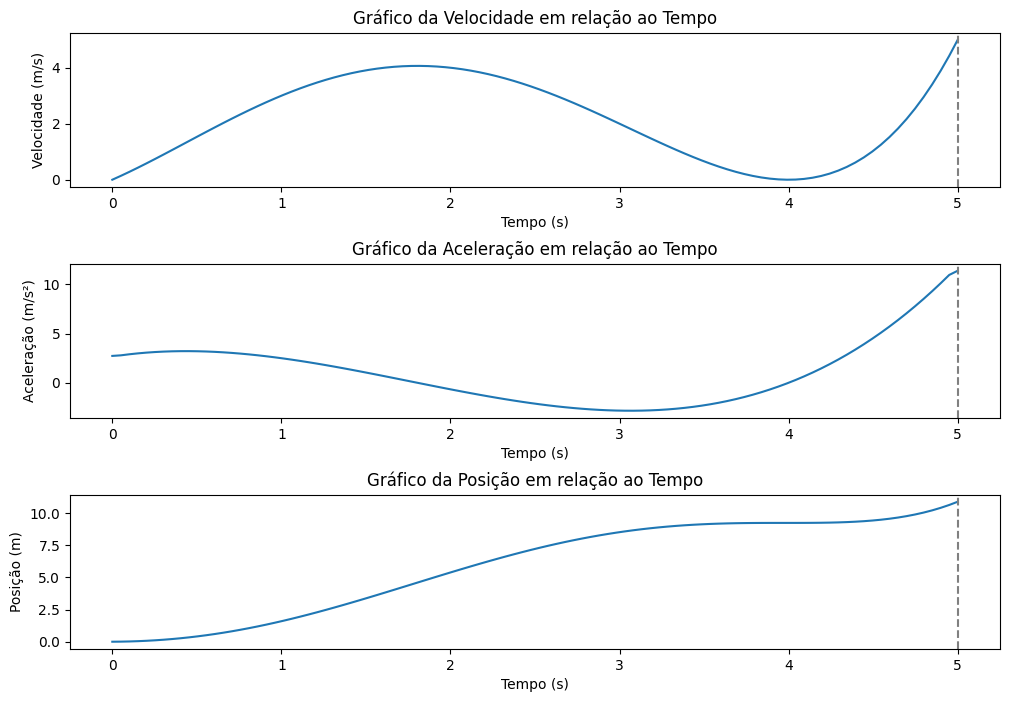

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Pontos dados
tempo = np.array([0, 1, 2, 3, 4])
velocidade = np.array([0, 3, 4, 2, 0])

# Encontrando o polinômio interpolador usando o método de Lagrange
polinomio_interpolador = lagrange(tempo, velocidade)

# Definindo o intervalo de tempo para os gráficos
intervalo_tempo = np.linspace(0, 5, 100)

# Calculando os valores do polinômio interpolador, velocidade, aceleração e posição
valores_polinomio = polinomio_interpolador(intervalo_tempo)
aceleracao = np.gradient(valores_polinomio, intervalo_tempo)
posicao = np.cumsum(valores_polinomio) * (intervalo_tempo[1] - intervalo_tempo[0])

# Plotando os gráficos
plt.figure(figsize=(12, 8))

# Gráfico da velocidade
plt.subplot(3, 1, 1)
plt.plot(intervalo_tempo, valores_polinomio)
plt.axvline(x=5, color='gray', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Gráfico da Velocidade em relação ao Tempo')

# Gráfico da aceleração
plt.subplot(3, 1, 2)
plt.plot(intervalo_tempo, aceleracao)
plt.axvline(x=5, color='gray', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)')
plt.title('Gráfico da Aceleração em relação ao Tempo')

# Gráfico da posição
plt.subplot(3, 1, 3)
plt.plot(intervalo_tempo, posicao)
plt.axvline(x=5, color='gray', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Gráfico da Posição em relação ao Tempo')

# Ajustando os espaçamentos entre os gráficos
plt.subplots_adjust(hspace=0.5)

# Exibindo os gráficos
plt.show()


Um engenheiro está projetando uma barragem de concreto com a forma de um trapézio retângulo. O projeto do perfil da barragem, olhando de lado, é dado pela função $f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$, onde $x$ é a altura acima da base (em metros), $a$ é a altura mínima da barragem (em metros), e $b$ é a amplitude da variação do perfil (em metros). Por razões de segurança, o perfil da barragem varia sinusoidalmente de $a$ até $a + b$ ao longo da altura.

O engenheiro precisa calcular o volume de concreto necessário para construir a barragem. Ele sabe que o comprimento da barragem é de $L$ metros e que o perfil é o mesmo em todo o seu comprimento.

Ele decide então modelar o volume de concreto necessário como a integral da função $f(x)$, de $0$ até a altura máxima $H$, multiplicada pelo comprimento $L$.

Dadas as seguintes informações:

- $a = 10$ metros
- $b = 5$ metros
- $H = 20$ metros
- $L = 100$ metros

Calcule o volume de concreto necessário para a construção da barragem e trace o gráfico da função que descreve o perfil da barragem e sombreie a área sob a curva que representa o volume de concreto.



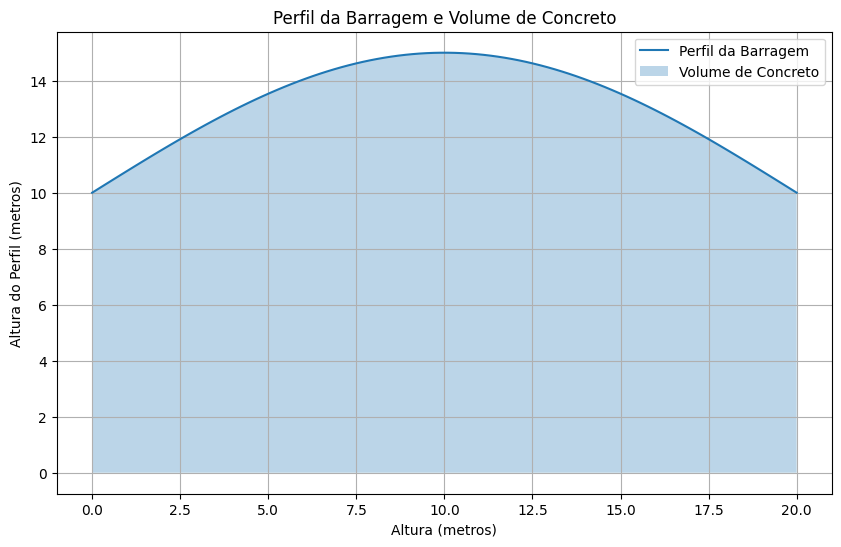

Volume de Concreto Necessário: 26366.19772367581 metros cúbicos


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parâmetros da barragem
a = 10  # Altura mínima da barragem (metros)
b = 5   # Amplitude da variação do perfil (metros)
H = 20  # Altura máxima da barragem (metros)
L = 100 # Comprimento da barragem (metros)

# Definição da função do perfil da barragem
def f(x):
    return a + b * np.sin(np.pi * x / H)

# Cálculo do volume de concreto
volume, _ = quad(f, 0, H)
volume *= L

# Plotagem do gráfico
x = np.linspace(0, H, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Perfil da Barragem')
plt.fill_between(x, y, alpha=0.3, label='Volume de Concreto')
plt.xlabel('Altura (metros)')
plt.ylabel('Altura do Perfil (metros)')
plt.title('Perfil da Barragem e Volume de Concreto')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir o volume de concreto necessário
print("Volume de Concreto Necessário:", volume, "metros cúbicos")
